第一问请见PDF

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv('./credit_card.csv', index_col = 0 )

In [3]:
data.head()

,BALANCE_FREQ,PURCHASE_FREQ,ONEOFF_FREQ,INSTALLMENTS_FREQ,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,
C10001,0.818182,0.166667,0.000000,0.083333,1000.0,0.000000,12
C10002,0.909091,0.000000,0.000000,0.000000,7000.0,0.222222,12
C10003,1.000000,1.000000,1.000000,0.000000,7500.0,0.000000,12
C10004,0.636364,0.083333,0.083333,0.000000,7500.0,0.000000,12
C10005,1.000000,0.083333,0.083333,0.000000,1200.0,0.000000,12


In [4]:
data.describe()

,BALANCE_FREQ,PURCHASE_FREQ,ONEOFF_FREQ,INSTALLMENTS_FREQ,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8950.000000
mean,0.877271,0.490351,0.202458,0.364437,4494.449450,0.153715,11.517318
std,0.236904,0.401371,0.298336,0.397448,3638.815725,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,6.000000
25%,0.888889,0.083333,0.000000,0.000000,1600.000000,0.000000,12.000000
50%,1.000000,0.500000,0.083333,0.166667,3000.000000,0.000000,12.000000
75%,1.000000,0.916667,0.300000,0.750000,6500.000000,0.142857,12.000000
max,1.000000,1.000000,1.000000,1.000000,30000.000000,1.000000,12.000000


In [5]:
#处理缺失值，CREDIT_LIMIT有一处缺失,因为是因变量缺失，外加上只缺失了一个，考虑直接去除。
data = data.dropna(axis=0)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, C10001 to C19190
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BALANCE_FREQ       8949 non-null   float64
 1   PURCHASE_FREQ      8949 non-null   float64
 2   ONEOFF_FREQ        8949 non-null   float64
 3   INSTALLMENTS_FREQ  8949 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   PRC_FULL_PAYMENT   8949 non-null   float64
 6   TENURE             8949 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 559.3+ KB


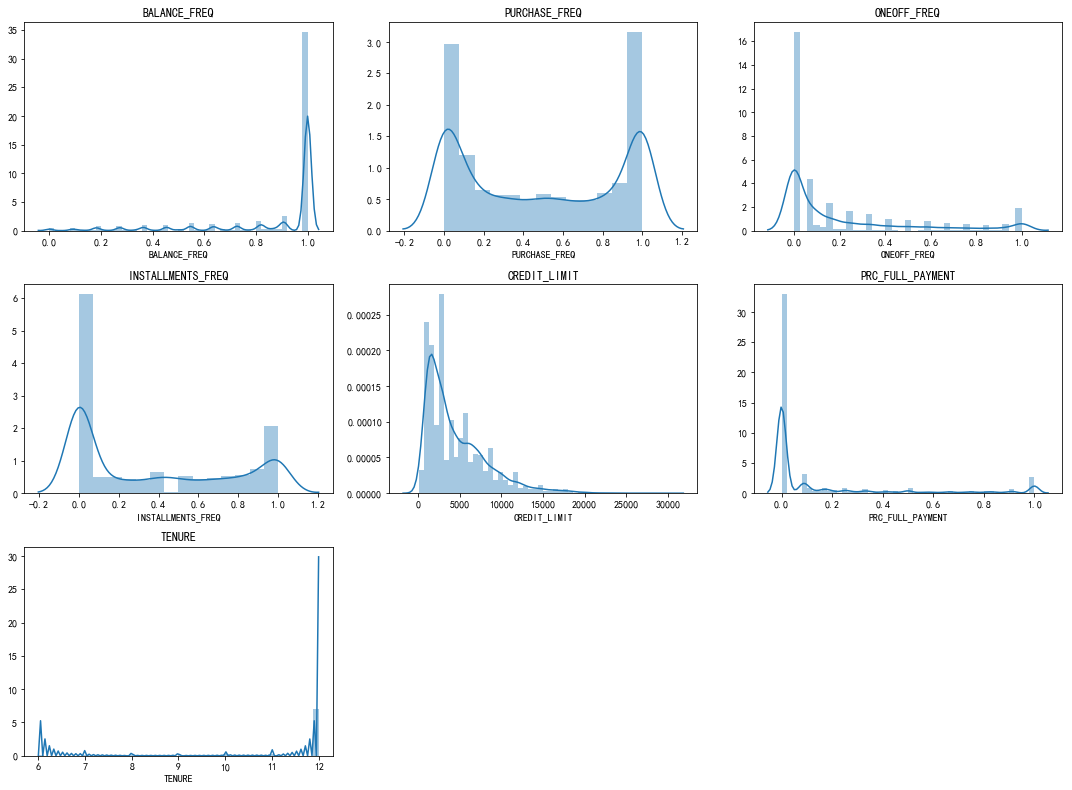

In [7]:
graph_by_variables = data.columns
plt.figure(figsize = (15, 18))
for i in range(0, 7):
    plt.subplot(5, 3, i+1)
    sns.distplot(data[graph_by_variables[i]])
    plt.title(graph_by_variables[i])
plt.tight_layout()

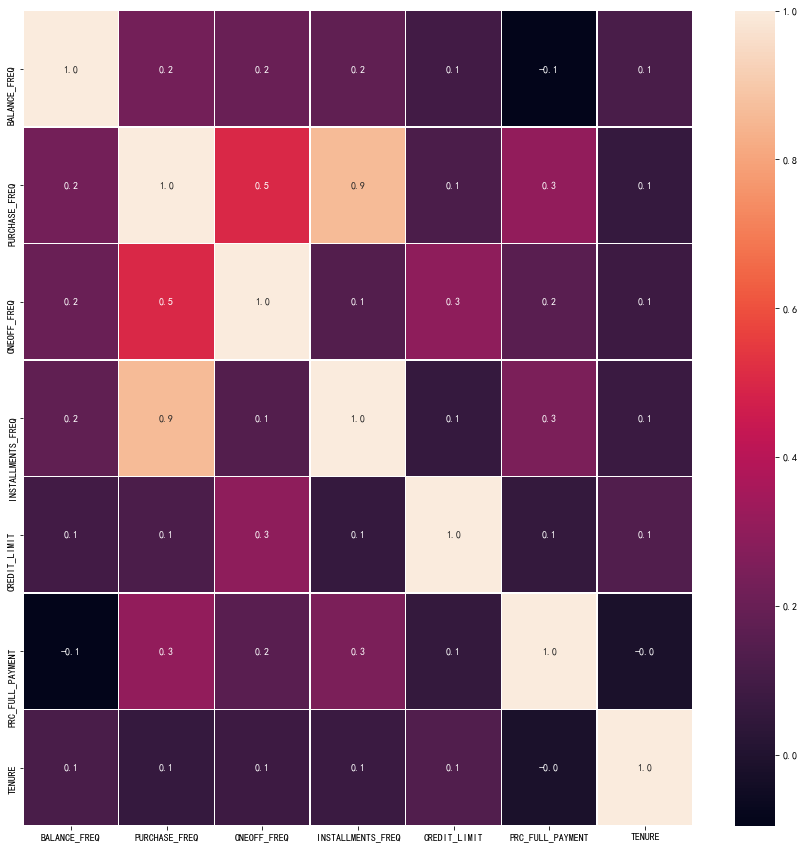

In [8]:
#相关性
f, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True, linewidths = 0.5, fmt = '.1f', ax = ax)

可以看出：
几乎所有购买都是分期购买，另外其余变量相关度不明显，PURCHASE_FREQ 和 INSTALLMENTS_FRAQ线性相关度很高

数据标准化

In [9]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
# 变量CREDIT_LIMIT指信用卡额度，通常作为因变量，故分析剩余变量
# data_s = data.drop(['CREDIT_LIMIT'], axis = 1)
data_s = data
graph_by_variables = data_s.columns
data_s = standardscaler.fit_transform(data_s)
data_s[:2]

array([[-0.24988139, -0.80664908, -0.67871619, -0.70740935, -0.96037969,
        -0.52558844,  0.36054128],
       [ 0.1340494 , -1.22192823, -0.67871619, -0.91708951,  0.68860056,
         0.2341587 ,  0.36054128]])

聚类分析: K-Means算法

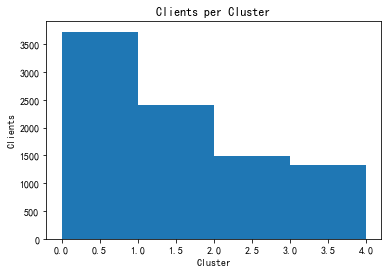

In [10]:
from sklearn.cluster import KMeans
n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters, random_state = 2021)
labels = kmeans.fit_predict(data_s)

# plot cluster sizes
plt.hist(labels, bins = range(n_clusters + 1))
plt.title ('Clients per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Clients')
plt.show()

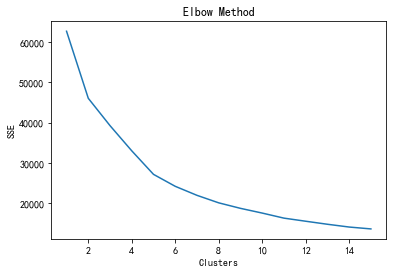

In [11]:
#肘部法选择最优聚类数
sse = []
cluster_list = range(1, 16)
for i in cluster_list :
    kmeans = KMeans(n_clusters = i, random_state = 2021)
    kmeans.fit(data_s)
    sse.append(kmeans.inertia_)
plt.plot(cluster_list, sse)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

没有明确肘部

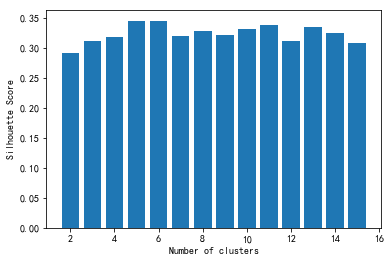

In [12]:
#用轮廓系数确定最优聚类数
from sklearn.metrics import silhouette_score
s = [] 
cluster_list = range(2, 16)
for i in cluster_list:
    kmeans = KMeans(n_clusters = i, random_state = 2021)
    s.append(silhouette_score(data_s, kmeans.fit_predict(data_s))) 
    
# Plotting a bar graph to compare the results 
plt.bar(cluster_list, s) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

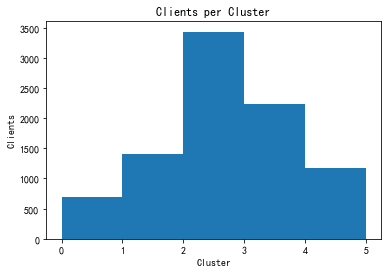

In [13]:
kmeans = KMeans(n_clusters = 5, random_state = 2021) 
labels = kmeans.fit_predict(data_s)
data["cluster"] = labels
# plot cluster sizes
plt.hist(labels, bins = range(6))
plt.title ('Clients per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Clients')
plt.show()

[[-3.29581844e-01 -2.13385233e-01 -2.59764558e-01 -2.42206764e-01
  -4.49724937e-01  4.41842391e-04 -3.14797351e+00]
 [ 4.24040716e-01  1.04384427e+00  1.97008487e+00  4.03374154e-01
   8.31143381e-01  4.38460121e-01  2.97637943e-01]
 [ 4.00519493e-01 -8.47464122e-01 -3.80583261e-01 -7.59473671e-01
  -6.90856719e-02 -4.44951939e-01  2.70783362e-01]
 [ 3.58430225e-01  1.00682602e+00 -3.31134366e-01  1.21555664e+00
  -1.83509553e-01  2.42494103e-01  2.63627112e-01]
 [-2.15665006e+00 -5.59736809e-01 -4.54293385e-01 -4.32994629e-01
  -1.74062863e-01  3.13274921e-01  2.15272919e-01]]


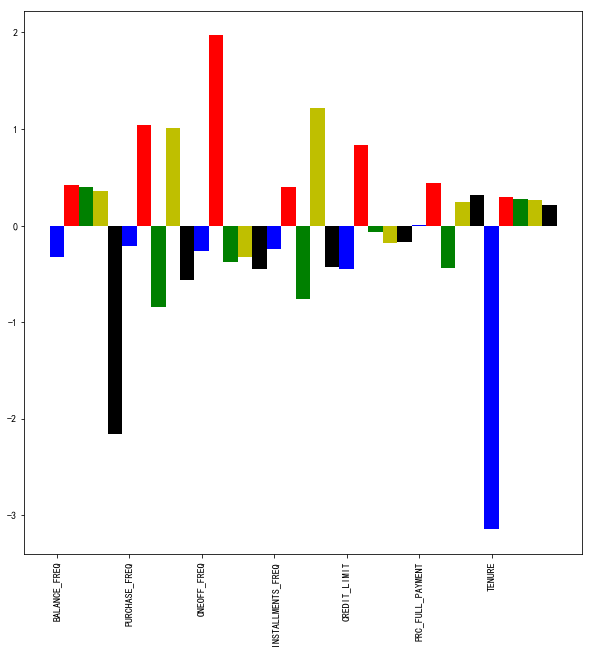

In [14]:
#聚类中心点可视化
plt.subplots(figsize = (10, 10))
centers = kmeans.cluster_centers_
print(centers)
idx = np.arange(7)
plt.bar(idx, centers[0], color = 'b', width = 0.2, tick_label = graph_by_variables)
plt.bar(idx + 0.2, centers[1], color = 'r', width = 0.2)
plt.bar(idx + 0.4, centers[2], color = 'g', width = 0.2)
plt.bar(idx + 0.6, centers[3], color = 'y', width = 0.2)
plt.bar(idx + 0.8, centers[4], color = 'k', width = 0.2)
plt.xticks(rotation = 90)
plt.show()

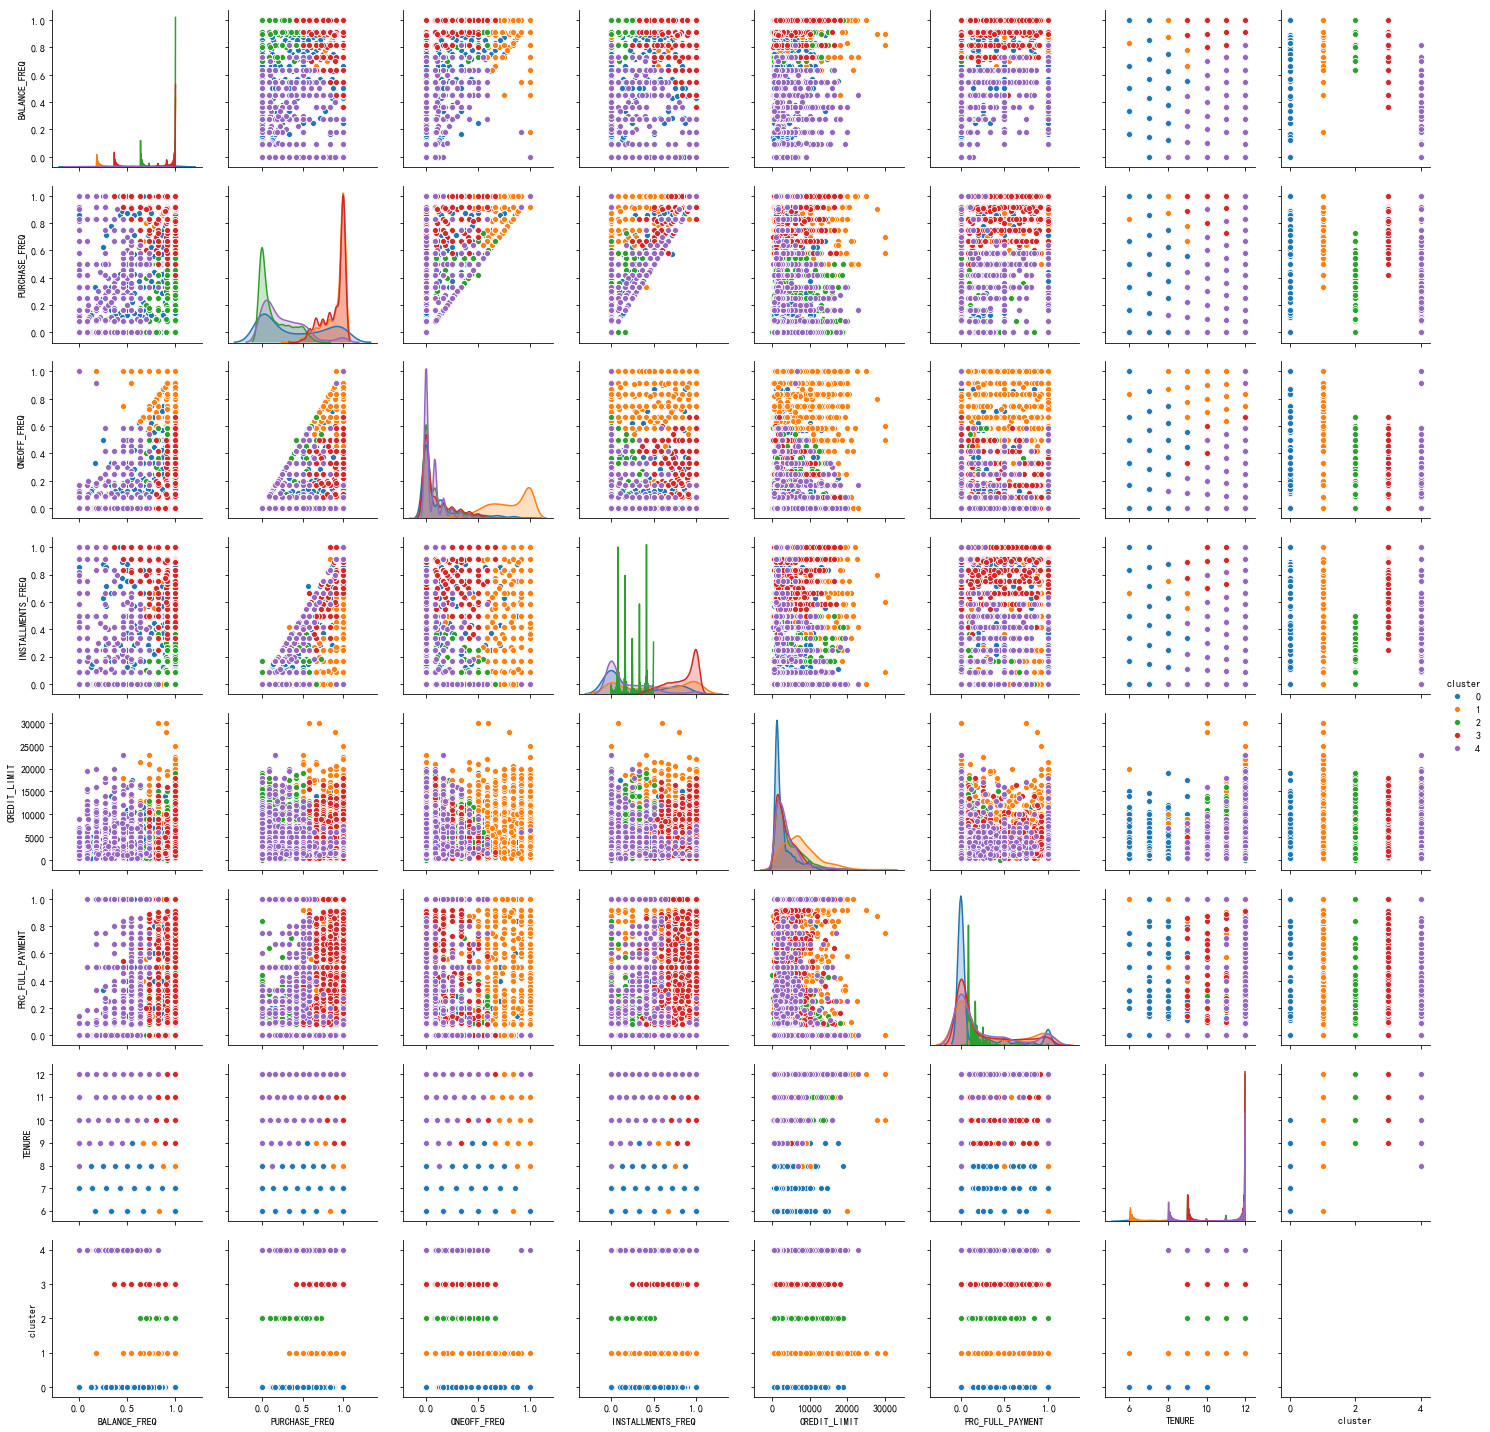

In [15]:
imp_cols = list(graph_by_variables)
imp_cols.append("cluster")
sns.pairplot(data[imp_cols], hue = "cluster")

K-MEANS结果分析：

1） 由于肘部法无法观测到明显拐点，所以采用轮廓系数。结合商业直觉，即过多的用户分组不会帮助决策，因此选择了分为五个聚类，放弃六类。

聚类1，即中心点可视化中的蓝色点，主要特点为购买频繁，且主要为分期购买，所以特点可以归纳为购买频繁，且习惯超前消费，平均额度

聚类2，即中心点可视化中的红色点，主要特点为购买不频繁，但也少分期购买，还款占全额账单的百分比比例较低，额度属于平均水品，特点可以归纳为正常消费，但还款能力弱，平均额度

聚类3，即中心点可视化中的绿色点，主要特点为购买频率高，其中一次性购买频率高，而分期购买的频率相比之下偏低（考虑到和购买频率低高度正相关），更倾向于一次性还款，属于优质客户，不超前消费，还款能力强。因此其信用卡额度也明显偏高。

聚类4，即中心点可视化中的黄色点，主要特点为除了服务使用期限特别短，其余都是接近平均水平，反映在每个变量都接近中间。此聚类的主要成员应该是TENURE中靠近0的波动段。其额度相对也是最低的。此聚类不清楚具体的商业情况，也许是留学生之类的短时停留的信用卡？因此使用期限短，消费习惯平均，额度最低

聚类5，即中心点可视化中的黑色点，主要特点为余额更新频率特别低，消费次数也偏少。由于余额更新频率和消费次数理论上呈现正相关，因此可以抽象为消费较少且不会主动提前还款的人群。

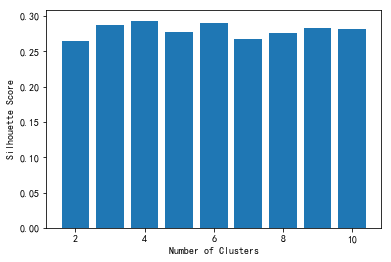

In [16]:
#聚类分析: 层次聚类
from sklearn.cluster import AgglomerativeClustering
s = [] 
cluster_list = range(2, 11)
for i in cluster_list:
    hc = AgglomerativeClustering(n_clusters = i)
    s.append(silhouette_score(data_s, hc.fit_predict(data_s)))
    
# Plotting a bar graph to compare the results 
plt.bar(cluster_list, s) 
plt.xlabel('Number of Clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

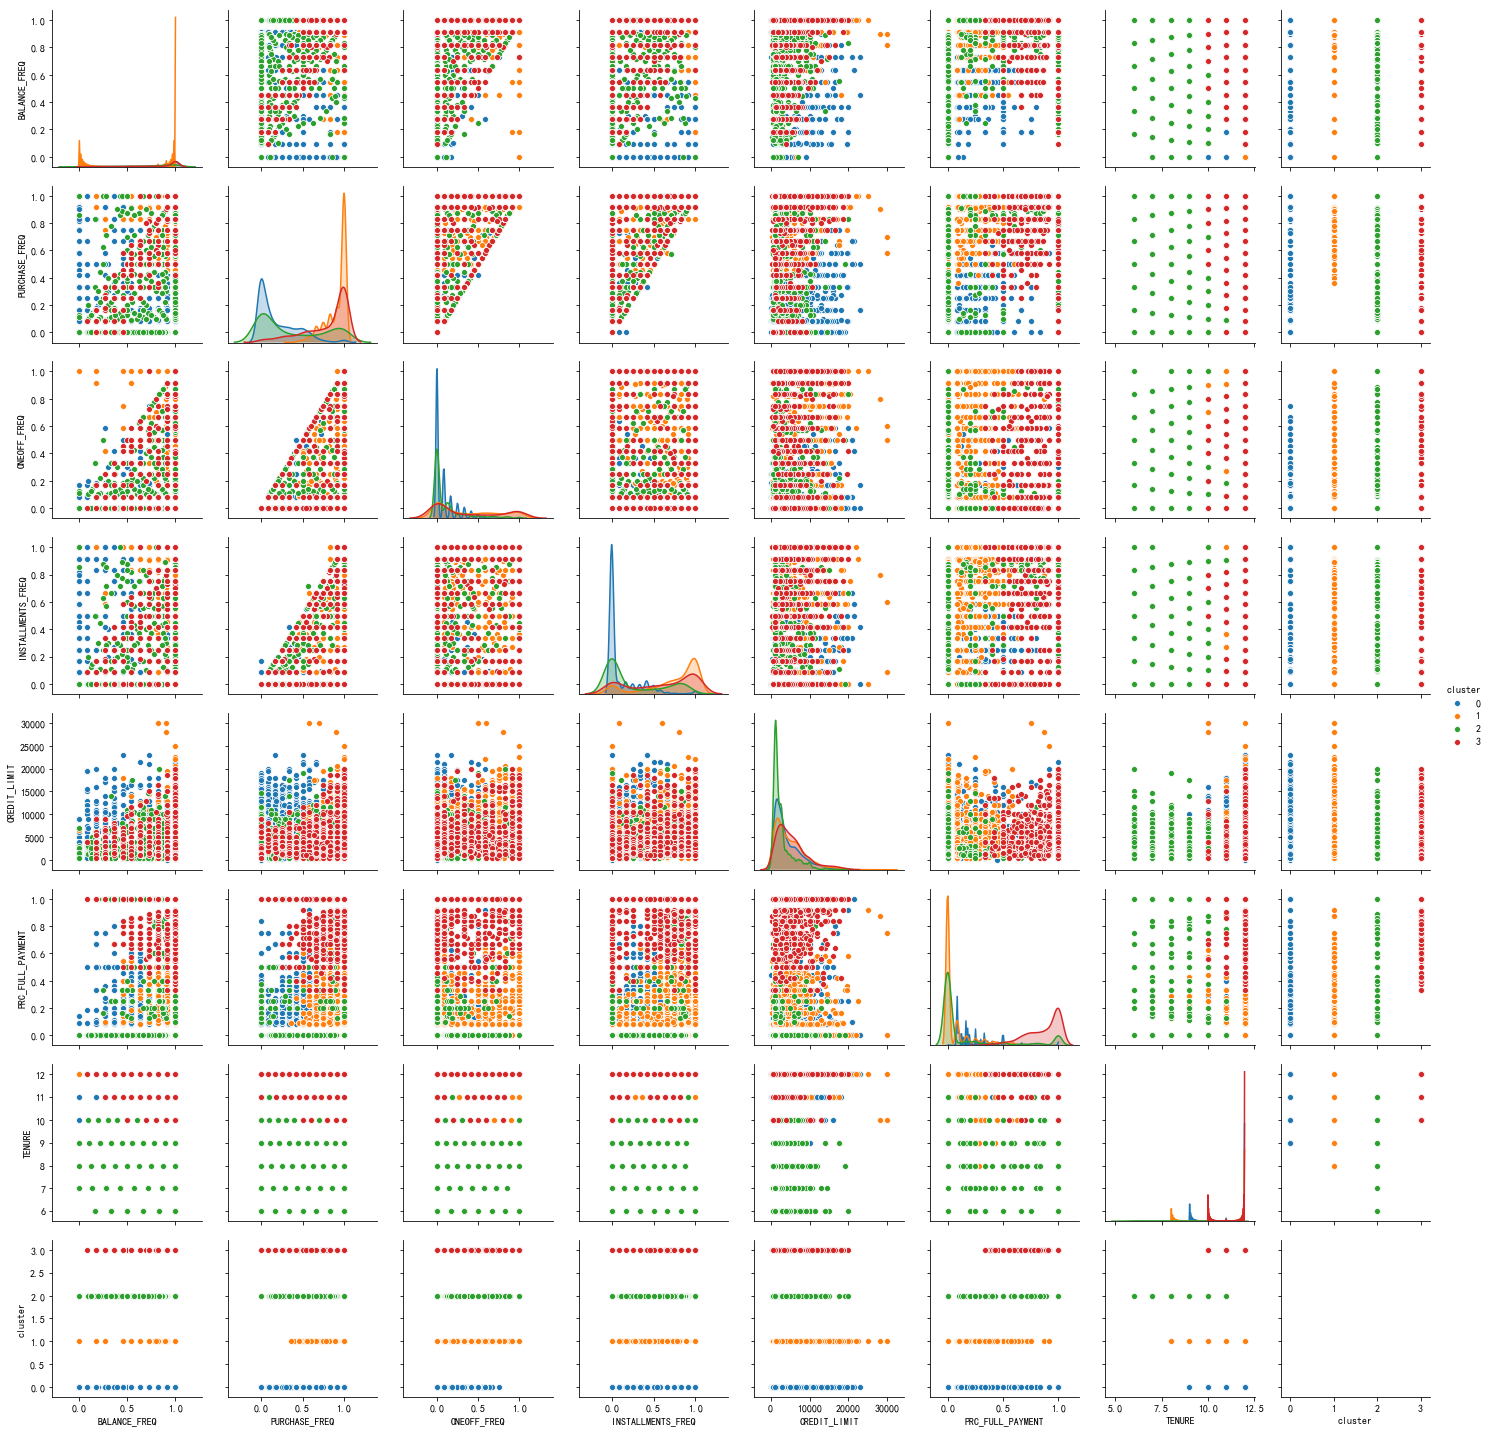

In [17]:
hc = AgglomerativeClustering(n_clusters = 4)
labels = hc.fit_predict(data_s)
data["cluster"] = labels
imp_cols = ['BALANCE_FREQ','PURCHASE_FREQ','ONEOFF_FREQ','INSTALLMENTS_FREQ','CREDIT_LIMIT','PRC_FULL_PAYMENT','TENURE', 'cluster']
sns.pairplot(data[imp_cols], hue = "cluster")

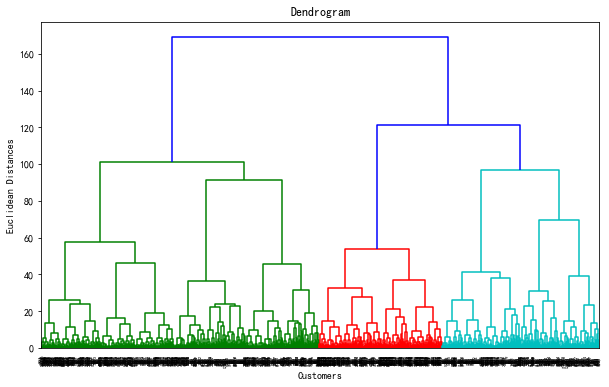

In [18]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize = (10, 6))
linked = sch.linkage(data_s, method = 'ward')
dendrogram = sch.dendrogram(linked, truncate_mode='level', p=10)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [19]:
# 获得每一个簇的原始数据标号
labels = sch.fcluster(linked, t=3, criterion='maxclust')

In [20]:
data_p = np.array(data)
data_p = np.delete(data_p,-1,axis = 1)
data_p.shape

(8949, 7)

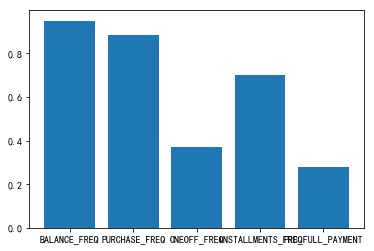

MEAN_CREDIT_LIMIT= 5119.511873461903
MEAN_TENURE = 11.888765294771968
标准化之后：


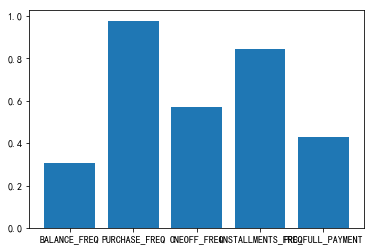

In [21]:
#获取三个簇每个簇的信息，采用簇内所有元素的均值作为特征
data_p = np.array(data)
data_p = np.delete(data_p,-1,axis = 1)
data_psum = np.array(np.zeros((1,7)))
arr = np.where(labels == 1)
for i in arr[0]:
    data_psum = data_psum + data_p[i]

index_x = ['BALANCE_FREQ','PURCHASE_FREQ','ONEOFF_FREQ','INSTALLMENTS_FREQ','PRC_FULL_PAYMENT']
index_y0 = np.delete((data_psum/len(arr[0]))[0],4)
index_y = np.delete(index_y0,5)
plt.bar(index_x, index_y)
plt.show()
print('MEAN_CREDIT_LIMIT=', (data_psum/len(arr[0]))[0][4])
print('MEAN_TENURE =', (data_psum/len(arr[0]))[0][6])
print('标准化之后：')


data_ssum = np.array(np.zeros((1,7)))
arr = np.where(labels == 1)
arr[0]
for i in arr[0]:
    data_ssum = data_ssum + data_s[i]

index_x = ['BALANCE_FREQ','PURCHASE_FREQ','ONEOFF_FREQ','INSTALLMENTS_FREQ','PRC_FULL_PAYMENT']
index_y0 = np.delete((data_ssum/len(arr[0]))[0],4)
index_y = np.delete(index_y0,5)
plt.bar(index_x, index_y)
plt.show()

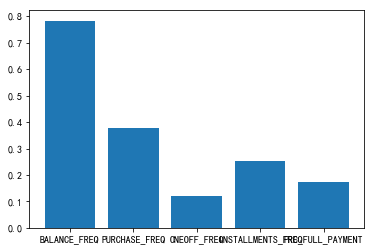

MEAN_CREDIT_LIMIT= 2862.5324180011444
MEAN_TENURE = 7.852402745995423
标准化之后：


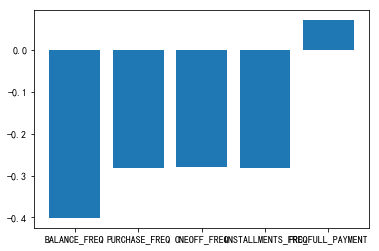

In [22]:
data_p = np.array(data)
data_p = np.delete(data_p,-1,axis = 1)
data_psum = np.array(np.zeros((1,7)))
arr = np.where(labels == 2)
arr[0]
for i in arr[0]:
    data_psum = data_psum + data_p[i]

index_x = ['BALANCE_FREQ','PURCHASE_FREQ','ONEOFF_FREQ','INSTALLMENTS_FREQ','PRC_FULL_PAYMENT']
index_y0 = np.delete((data_psum/len(arr[0]))[0],4)
index_y = np.delete(index_y0,5)
plt.bar(index_x, index_y)
plt.show()
print('MEAN_CREDIT_LIMIT=', (data_psum/len(arr[0]))[0][4])
print('MEAN_TENURE =', (data_psum/len(arr[0]))[0][6])
print('标准化之后：')

data_ssum = np.array(np.zeros((1,7)))
arr = np.where(labels == 2)
arr[0]
for i in arr[0]:
    data_ssum = data_ssum + data_s[i]

index_x = ['BALANCE_FREQ','PURCHASE_FREQ','ONEOFF_FREQ','INSTALLMENTS_FREQ','PRC_FULL_PAYMENT']
index_y0 = np.delete((data_ssum/len(arr[0]))[0],4)
index_y = np.delete(index_y0,5)
plt.bar(index_x, index_y)
plt.show()

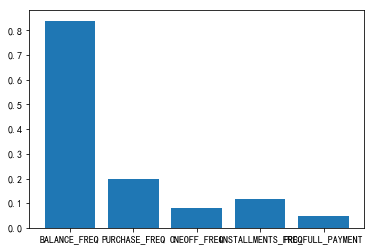

MEAN_CREDIT_LIMIT= 4311.053829205403
MEAN_TENURE = 11.935476668899307
标准化之后：


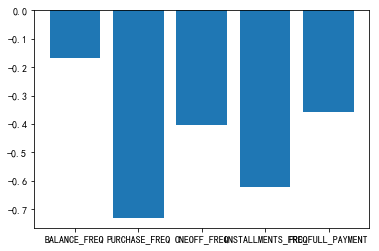

In [23]:
data_p = np.array(data)
data_p = np.delete(data_p,-1,axis = 1)
data_psum = np.array(np.zeros((1,7)))
arr = np.where(labels == 3)
arr[0]
for i in arr[0]:
    data_psum = data_psum + data_p[i]

index_x = ['BALANCE_FREQ','PURCHASE_FREQ','ONEOFF_FREQ','INSTALLMENTS_FREQ','PRC_FULL_PAYMENT']
index_y0 = np.delete((data_psum/len(arr[0]))[0],4)
index_y = np.delete(index_y0,5)
plt.bar(index_x, index_y)
plt.show()
print('MEAN_CREDIT_LIMIT=', (data_psum/len(arr[0]))[0][4])
print('MEAN_TENURE =', (data_psum/len(arr[0]))[0][6])
print('标准化之后：')
data_ssum = np.array(np.zeros((1,7)))
arr = np.where(labels == 3)
arr[0]
for i in arr[0]:
    data_ssum = data_ssum + data_s[i]

index_x = ['BALANCE_FREQ','PURCHASE_FREQ','ONEOFF_FREQ','INSTALLMENTS_FREQ','PRC_FULL_PAYMENT']
index_y0 = np.delete((data_ssum/len(arr[0]))[0],4)
index_y = np.delete(index_y0,5)
plt.bar(index_x, index_y)
plt.show()

层次聚类结果分析：

层次聚类共分为三个聚类，每个聚类分别有两张图，第一张是该聚类内元素的参数的平均分布情况，第二张图是标准化之后的情况。同时附有两个值，分别是平均额度和平均期限。

第一个聚类：可以看出在标准化后，其五项指标均超出平均值，而且同时，其平均额度是最高的，平均期限接近最高（12），可以概括为优质客户

第二个聚类：在标准化后，其余额更新频率（BALANCE_FREQ）明显偏低，其因变量，即平均额度最低，平均期限偏短，只有接近八年，和第三个聚类横向比较，可以得出余额更新频率是制定平均额度的最重要的参数。相比之下属于质量偏低的客户

第三个聚类在标准化后，除了余额更新频率（BALANCE_FREQ），均明显劣于二类客户，但是其平均额度在两者之间，并且与另外两者均有明显差别，其平均额度最长，只能解释为银行倾向于按照余额更新频率选择平均额度，属于质量在中等的客户。

值得注意的是，从绝对值看，三类聚类的余额更新频率都很高，都介于0.75到0.9之间，因此该聚类可能受余额更新频率影响较大，而对于其他自变量的解释性并不好。


In [ ]:
和前方的K均值聚类结果对比：

先考虑客观指标：
K均值聚类分为五类，轮廓系数为0.34；层次聚类分为三类，轮廓系数为0.27

再考虑主观指标：
对比前文对于客户分群的解读，可以发现，K均值分出了更多的类群，每一类相对来说都有一个突出的特点/缺点，也便于后续分析，精准营销，分类相对更加具体，特征更加鲜明。

而层次聚类分为了三类，其中第一类毫无疑问是优质客户，具有所有项目都在平均以上的特点，而二三类特点不鲜明，适合笼统聚类为不那么优质的客户，相对特点抽象能力较弱，适合于特定业务场景，比如只需要寻找高端优质客户。

因此整体来看，K均值聚类在该特定任务下表现更好。